<p style="text-align: center;" ><font size="+3"><u><b>Optimization Example</u></b></p>

In [10]:
import cma
import numpy as np
import matplotlib.pyplot as plt

# Function definitions

In [18]:
def elliptic_paraboloid(U, V, o1, o2, a, b):
    return (U - o1)**2 / a**2 + (V - o2)**2 / b**2

In [29]:
def objfunc_paraboloid(xv, target_surf, U, V):
    # parse optimization parameters
    o1 = xv[0]
    o2 = xv[1]
    a = xv[2]
    b = xv[3]
    
    # model prediction of paraboloid  
    est_surf = elliptic_paraboloid(U, V, o1, o2, a, b)
    
    # calculate the objective function - sum of squared error
    sqe = np.sum((target_surf - est_surf)**2)
    
    return sqe

# Make target

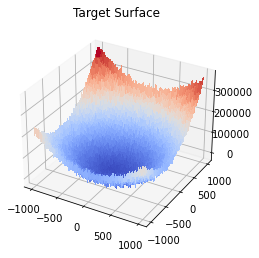

In [32]:
# make a target surface to fit to

o1 = 56
o2 = -250
a = 2.9
b = 2.5

u = v = np.arange(-100, 101) * 10.
v = np.arange(-100, 101) * 10.
[U, V] = np.meshgrid(u, v);

target_surf = elliptic_paraboloid(U, V, o1, o2, a, b)
target_surf = target_surf + np.random.randn(target_surf.shape[0], target_surf.shape[0])*1e4


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(U, V, target_surf, cmap='coolwarm',
                       linewidth=0, antialiased=False)
ax.set_title('Target Surface')
plt.show()


# Initialize CMA-ES and run optimization

In [25]:
# initial guesses
# we want to find o1, o2, a, and b
x0 = [54, -240, 2.5, 2.5]

# Parameters for CMA-ES 
tolfun = 5e11
tolx = 1e-2
sigma0 = 0.1 
# population size:
popsize = 20
opts = {'tolfun':tolfun, 'tolx':tolx, 'verb_disp':20, 'popsize':popsize, }


In [45]:
# initialize
es = cma.CMAEvolutionStrategy(x0, sigma0, opts)
# variable to store objective function values after each iteration
fit = np.empty(popsize)
while not es.stop():  # my_desired_target_f_value
    new_soln = es.ask()  
    for ct, soln in enumerate(new_soln):
        fit[ct] = objfunc_paraboloid(soln, target_surf, U, V)
    es.tell(new_soln, fit)
    es.disp(20)
    
xopt = es.result[0] 
objfuncopt = es.result[1]
print('Solution: ' + str(xopt))
print('Final objective function value: ' + str(objfuncopt))
print('Stopping criterion: ', es.stop())

(10_w,20)-aCMA-ES (mu_w=5.9,w_1=27%) in dimension 4 (seed=955374, Tue Apr 20 12:09:56 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     20 6.752831562843137e+12 1.0e+00 1.71e-01  2e-01  2e-01 0:00.0
    2     40 4.582396964624297e+12 1.6e+00 2.33e-01  2e-01  3e-01 0:00.1
    3     60 5.238949453448295e+12 1.9e+00 2.23e-01  2e-01  3e-01 0:00.2
   19    380 4.130931317303497e+12 3.0e+01 5.99e-02  3e-03  8e-02 0:00.6
Solution: [  53.7733428  -240.08417388    2.90301155    2.47855218]
Final objective function value: 4130931317303.4966
Stopping criterion:  {'tolfun': 500000000000.0}


# Plot results

In [46]:
est_surf = elliptic_paraboloid(U, V, xopt[0], xopt[1], xopt[2], xopt[3])

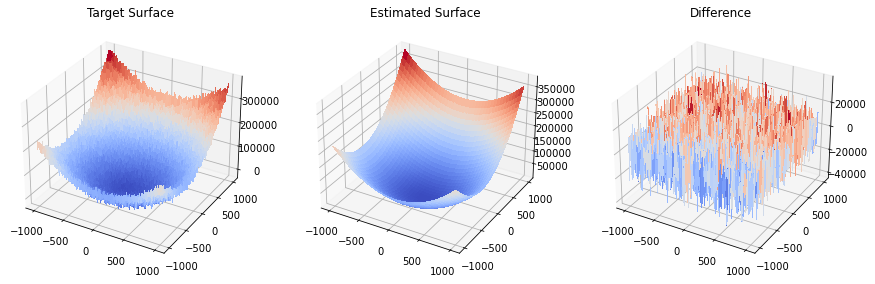

In [48]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, ncols=3, figsize=(15, 5))
ax[0].plot_surface(U, V, target_surf, cmap='coolwarm',
                       linewidth=0, antialiased=False)
ax[0].set_title('Target Surface')

ax[1].plot_surface(U, V, est_surf, cmap='coolwarm',
                       linewidth=0, antialiased=False)
ax[1].set_title('Estimated Surface')
surf = ax[2].plot_surface(U, V, target_surf - est_surf, cmap='coolwarm',
                       linewidth=0, antialiased=False)
ax[2].set_title('Difference')

plt.show()